Библиотеки

In [1]:
import timm
from PIL import Image
import requests

import numpy as np
import torchvision.transforms as T
import torch.nn.functional as F

import matplotlib.pyplot as plt
import torch

Загружаем модель, и список категорий

In [2]:
xception = timm.create_model('xception', pretrained=True)

import urllib
url, filename = ('https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt', 'imagenet_classes.txt')
urllib.request.urlretrieve(url, filename) 
with open('imagenet_classes.txt', 'r') as f:
    categories = [s.strip() for s in f.readlines()]

Загружаем картинку

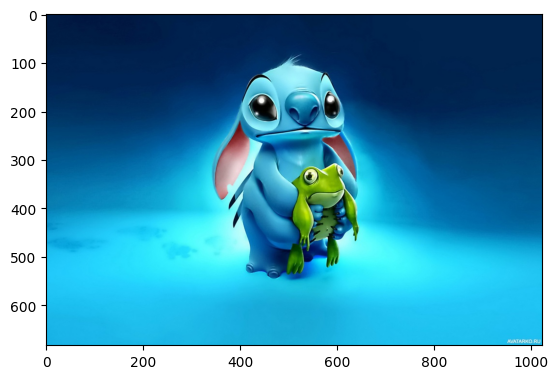

In [3]:
url = 'https://avatarko.ru/img/kartinka/33/multfilm_lyagushka_32117.jpg'

img = Image.open(requests.get(url, stream=True).raw)
img = T.ToTensor()(img).unsqueeze(0)

plt.imshow(torch.permute(img.squeeze(0), (1, 2, 0)));

Получаем предсказания

In [4]:
xception.eval()
predictions = xception(img)
predictions = F.softmax(predictions[0], dim=0)

print(f'"{categories[predictions.argmax()]}" with probability {round(predictions[predictions.argmax()].item(), 5)}')

"balloon" with probability 0.00648
